In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def lorenz(t, state, sigma, beta, rho):
    x, y, z  = state
    
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    
    return [dx, dy, dz]

sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

p = (sigma, beta, rho) # parameters of the system

y0 = [1.0, 1.0, 1.0] # initial state of the system

In [9]:
t_span = (0.0, 40.0)
t = np.arange(0.0, 40.0, 0.01)

result_odeint = odeint(lorenz, y0, t, p, tfirst=True)
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p)

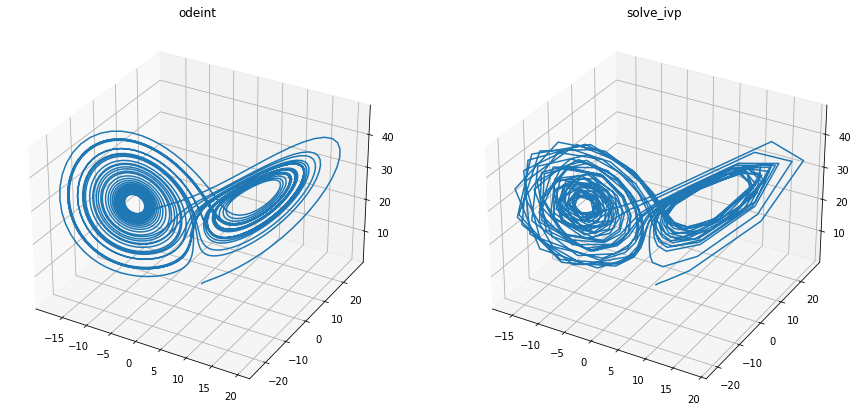

In [10]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeint[:, 0],
       result_odeint[:, 1],
       result_odeint[:, 2])
ax.set_title('odeint')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
       result_solve_ivp.y[1, :],
       result_solve_ivp.y[2, :])
ax.set_title('solve_ivp')

plt.show()

`solve_ivp` is less smooth, because it is calculated at fewer time points, which has to do with the difference in `t_span` and `t`. `solve_ivp` determines the temporal resolution by itself, depending on the integration method and the desired accuracy of the solution. Therefore, it expects a tuple, instead of an array of time points.

In [11]:
t.shape

(4000,)

In [12]:
result_odeint.shape

(4000, 3)

In [13]:
result_solve_ivp.t.shape

(467,)

To achieve a smoother result, change the integration **method**. It's also possible to define the time points or decrease the error of the solution.

Default method of `solve_ivp` is `RK45`.

In [19]:
solve_ivp_rk45 = solve_ivp(lorenz, t_span, y0, args=p, method='RK45')
solve_ivp_lsoda = solve_ivp(lorenz, t_span, y0, args=p, method='LSODA')

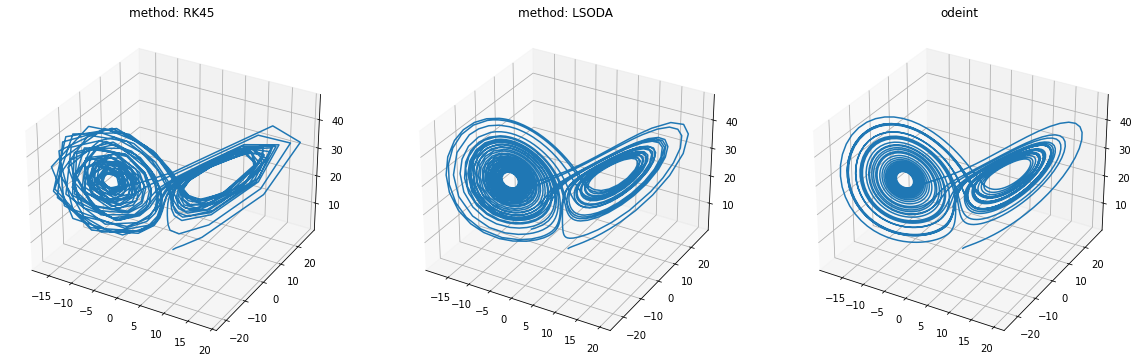

In [26]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot(solve_ivp_rk45.y[0, :],
       solve_ivp_rk45.y[1, :],
       solve_ivp_rk45.y[2, :])
ax.set_title('method: RK45')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot(solve_ivp_lsoda.y[0, :],
       solve_ivp_lsoda.y[1, :],
       solve_ivp_lsoda.y[2, :])
ax.set_title('method: LSODA')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot(result_odeint[:, 0],
       result_odeint[:, 1],
       result_odeint[:, 2])
ax.set_title('odeint')

plt.show()

It still does not have the same accuracy as odeint. This has to do with the temporal resolution. We must pass the exact time points with the `t_eval` parameter.

In [31]:
t = np.arange(0.0, 40.0, 0.01)

result_odeint = odeint(lorenz, y0, t, p, tfirst=True)
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p, method='LSODA', t_eval=t)

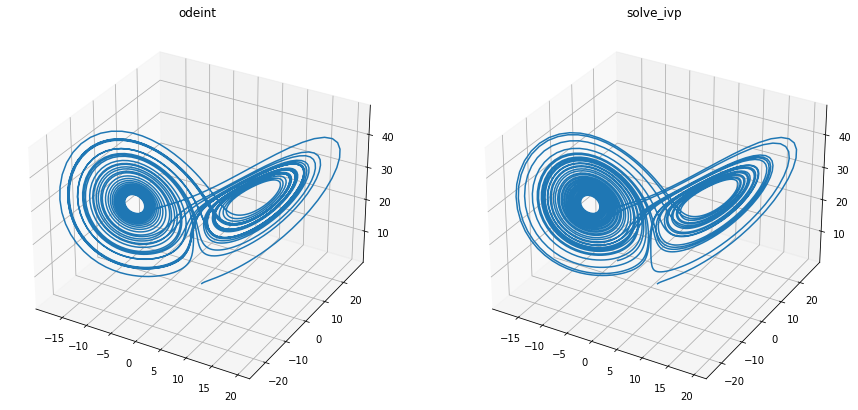

In [32]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeint[:, 0],
       result_odeint[:, 1],
       result_odeint[:, 2])
ax.set_title('odeint')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
       result_solve_ivp.y[1, :],
       result_solve_ivp.y[2, :])
ax.set_title('solve_ivp')

plt.show()

Both solutions have identical temporal solution. However, their solution is still not identical. This has probably to do with floating point errors, as Lorenz attactor is a chaotic system and even small errors can make it diverge.